In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp phenotype

In [ ]:
from chewc.core import *
from chewc.meiosis import *
from chewc.trait import *

import torch

## Phenotype
> Individuals + Traits -> Measurements

In [ ]:
#boilerplate example
ploidy = 2
number_chromosomes = 10
loci_per_chromosome = 100
n_founders = 50
genetic_map = create_random_genetic_map(number_chromosomes,loci_per_chromosome)
crop_genome = Genome(ploidy, number_chromosomes, loci_per_chromosome, genetic_map)
founder_pop = create_random_founder_pop(crop_genome , n_founders)

In [ ]:
#add trait
qtl_map = select_qtl_loci(20, crop_genome)
marker_fx = generate_marker_effects(qtl_map)

founder_genetic_variance = calculate_genetic_variance(founder_pop,marker_fx,crop_genome)
scaled_marker_fx = scale_marker_effects(marker_fx, founder_genetic_variance, 0.5)

ta = TraitA(qtl_map,scaled_marker_fx,crop_genome, founder_pop, 1,.5)

In [ ]:
founder_gv = ta.calculate_genetic_value(founder_pop).shape

In [ ]:
def phenotype_round(gv, varE):
    pass

<matplotlib.collections.PathCollection>

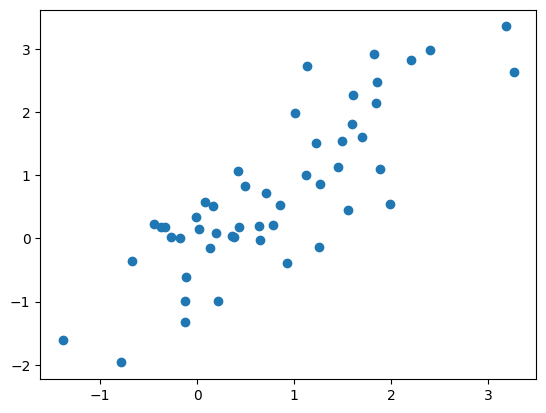

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ta.calculate_genetic_value(founder_pop), ta.setPheno(founder_pop, varE=torch.tensor(.5)))

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()